# Example 12.2: Joule-Thomson Coefficient

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Estimate the Joule-Thomson coefficient for R-134a at $80^\circ\mathrm{C}$ and $200\ \mathrm{kPa}$

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
import numpy as np
   
ref = realfluid.Properties('R134a')

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


In [2]:
# State of interest
p['A'] = Quantity(200,'kPa')
T['A'] = Quantity(80,'degC')
states.fix('A',ref)

# Forward state
p['B'] = Quantity(240,'kPa')
h['B'] = h['A']
states.fix('B',ref)

# Backward state
p['C'] = Quantity(180,'kPa')
h['C'] = h['A']
states.fix('C',ref)

# Forward Difference
dTdp_h_forward = (T['B']-T['A'])/(p['B']-p['A'])

# Backward Difference
dTdp_h_backward = (T['C']-T['A'])/(p['C']-p['A'])

# Central Difference
dTdp_h_central = (T['B']-T['C'])/(p['B']-p['C'])

display.Calculations(locals(),comments=True);

 State of interest

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Forward state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Backward state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Forward Difference

<IPython.core.display.Latex object>

 Backward Difference

<IPython.core.display.Latex object>

 Central Difference

<IPython.core.display.Latex object>

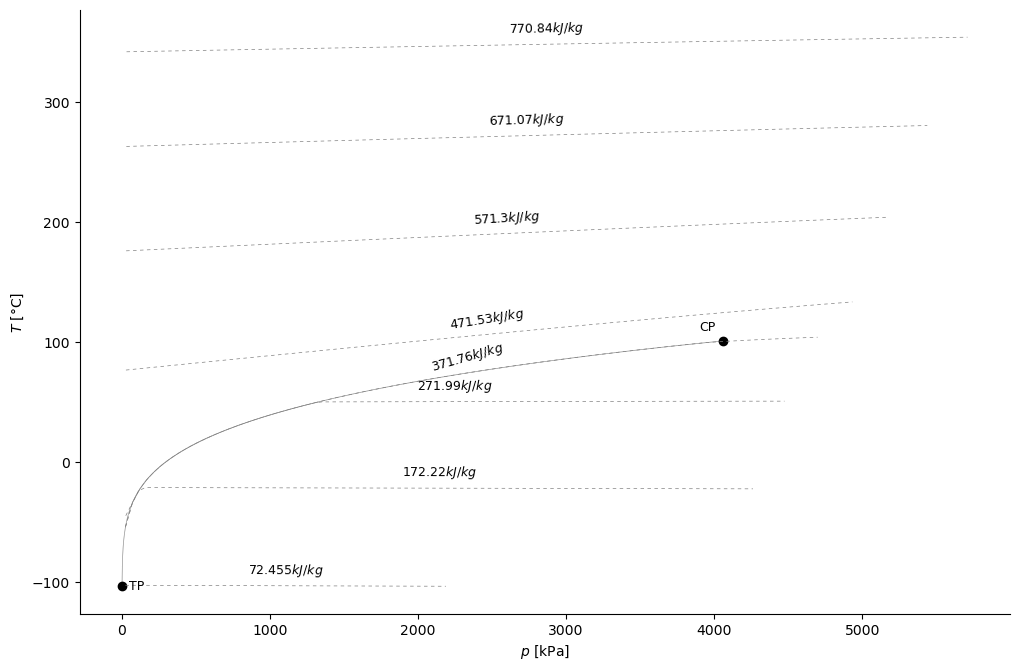

In [3]:
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*3
for i in np.arange(h_min+1,h_max,(h_max-h_min)/11):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

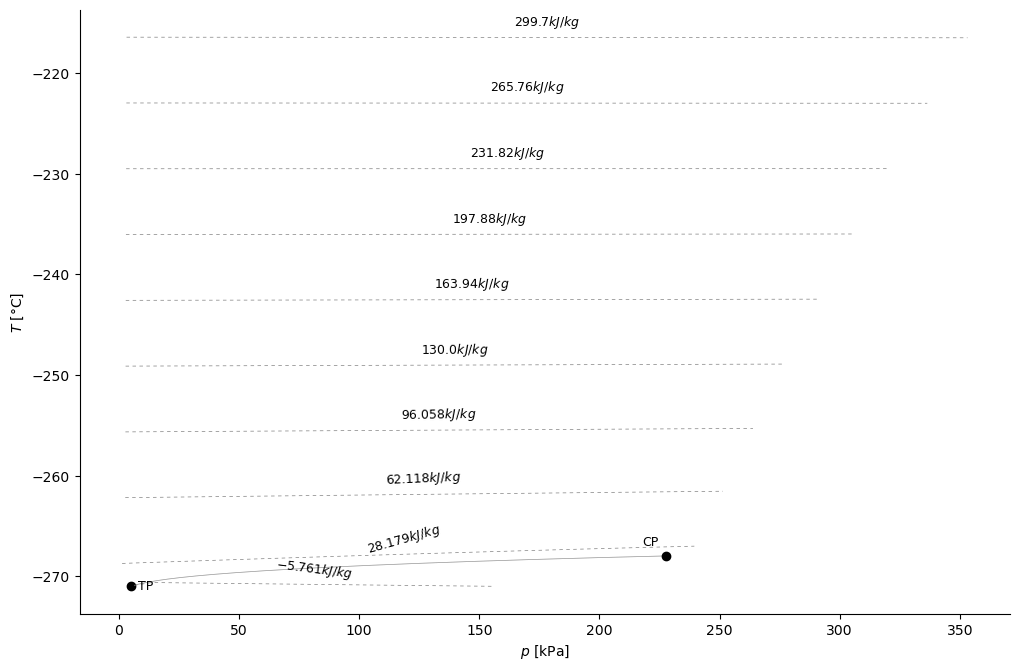

In [4]:
ref = realfluid.Properties('helium')
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*30
for i in np.arange(h_min+1,h_max,(h_max-h_min)/10):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

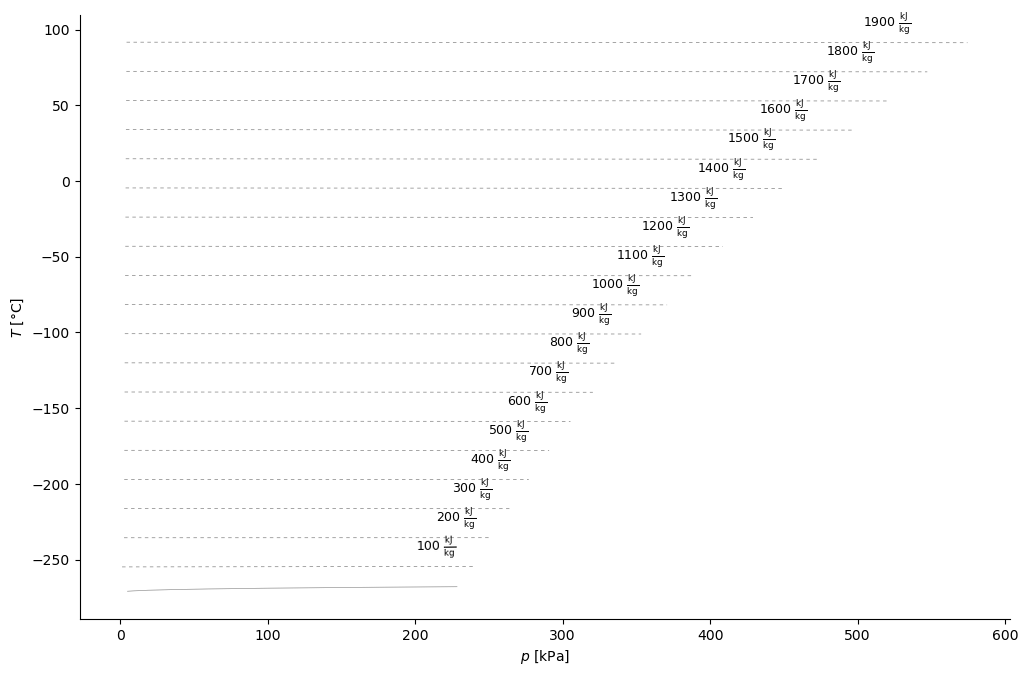

In [5]:
plt = ref.property_diagram(x='p',y='T')

for i in range(100,2000,100):
    try:
        plt.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False)
    except:
        break

In [6]:
import CoolProp
CoolProp.CoolProp.FluidsList()

['1-Butene',
 'Acetone',
 'Air',
 'Ammonia',
 'Argon',
 'Benzene',
 'CarbonDioxide',
 'CarbonMonoxide',
 'CarbonylSulfide',
 'CycloHexane',
 'CycloPropane',
 'Cyclopentane',
 'D4',
 'D5',
 'D6',
 'Deuterium',
 'Dichloroethane',
 'DiethylEther',
 'DimethylCarbonate',
 'DimethylEther',
 'Ethane',
 'Ethanol',
 'EthylBenzene',
 'Ethylene',
 'EthyleneOxide',
 'Fluorine',
 'HFE143m',
 'HeavyWater',
 'Helium',
 'Hydrogen',
 'HydrogenChloride',
 'HydrogenSulfide',
 'IsoButane',
 'IsoButene',
 'Isohexane',
 'Isopentane',
 'Krypton',
 'MD2M',
 'MD3M',
 'MD4M',
 'MDM',
 'MM',
 'Methane',
 'Methanol',
 'MethylLinoleate',
 'MethylLinolenate',
 'MethylOleate',
 'MethylPalmitate',
 'MethylStearate',
 'Neon',
 'Neopentane',
 'Nitrogen',
 'NitrousOxide',
 'Novec649',
 'OrthoDeuterium',
 'OrthoHydrogen',
 'Oxygen',
 'ParaDeuterium',
 'ParaHydrogen',
 'Propylene',
 'Propyne',
 'R11',
 'R113',
 'R114',
 'R115',
 'R116',
 'R12',
 'R123',
 'R1233zd(E)',
 'R1234yf',
 'R1234ze(E)',
 'R1234ze(Z)',
 'R124',
 'R

In [7]:
hyd = realfluid.Properties('Hydrogen')
h = hyd.h(T=Quantity(-245,'degC'),p=Quantity(100,'kPa'))
h

536.7784690163784 <Unit('kilojoule / kilogram')>

In [8]:
plt = hyd.property_diagram(x='p',y='T')

for i in [500,600,700,800,900,1000,1500]:
    plt.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False)
    
plt.ax.title='title'

AttributeError: 'str' object has no attribute 'get_position'

<Figure size 1200x800 with 1 Axes>

### (a) Clapeyron equation
The Clapeyron equation relates the enthalpy of vaporization to easily measureable properties, $T$, $p$, and $v$
$$ \left( \frac{\partial p}{\partial T} \right)_{sat} = \frac{h_{fg}}{Tv_fg}$$
This can be solved for the enthalpy
$$ h_{fg} = Tv_{fg}\left(\frac{\partial P}{\partial T}\right)_{sat} $$
The application of this equation depends on knowing the partial derivative of the pressure with respect to the temperature during phase change.  This can be visualized as the slope of the saturation curve on a $p$-$T$ diagram at the pressure of interest

In [11]:
v_fg = v[4]-v[1]

display.Calculations(locals());

KeyError: '4'

KeyError: 'T'

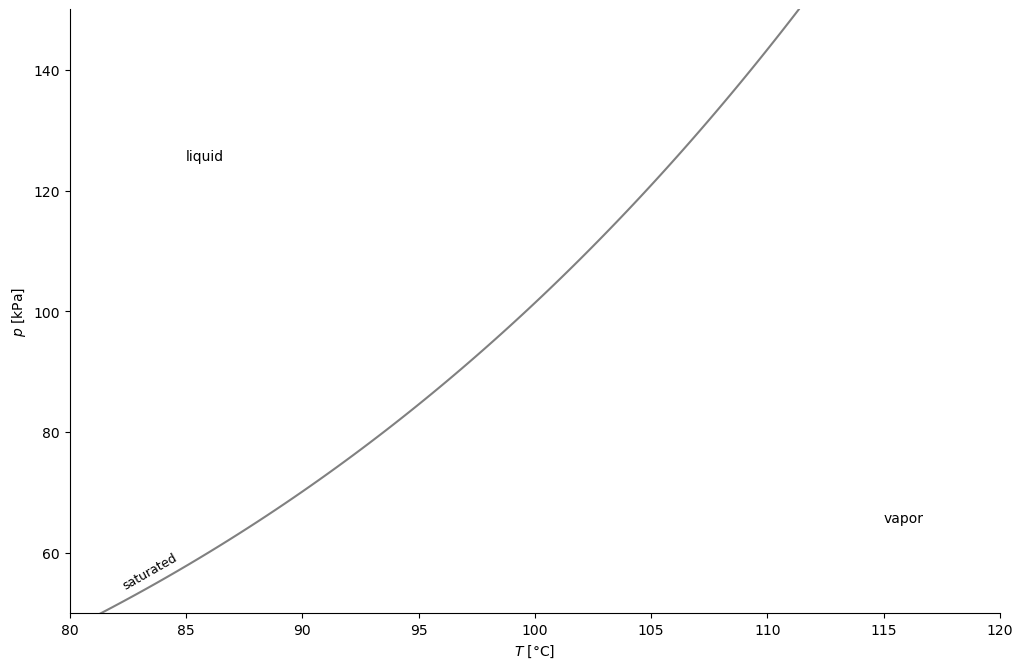

In [10]:
pT = water.property_diagram(x="T",y="p",saturation=False)
pT.ax.set_ylim(bottom=50,top=150)
pT.ax.set_xlim(left=80,right=120)

# Label phases
pT.plot_iso_line("x",0,y_range=[50,150]*units('kPa'),label='saturated',ycoor=55,color='gray')
pT.ax.text(85,125,'liquid')
pT.ax.text(115,65,'vapor')

# Plot states
pT.plot_state(states[1],label_loc='north west')
pT.plot_state(states[2],label_loc='north west')
pT.plot_state(states[3],label_loc='north west')


#### Forward Difference

In [ ]:
dPdT_forward = (p[2]-p[1])/(T[2]-T[1])
h_fg_forward = T[1].to('K')*v_fg*dPdT_forward
h_fg_forward = h_fg_forward.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

In [ ]:
x = Quantity([80,120],'degC')
y = dPdT_forward*(x-T[1]) + p[1]
pT.ax.plot(x,y,color='black',linewidth=.5,label='forward')
pT.fig.legend()
pT.show()

#### Backward Difference

In [ ]:
dPdT_backward = (p[1]-p[3])/(T[1]-T[3])
h_fg_backward = T[1].to('K')*v_fg*dPdT_backward
h_fg_backward = h_fg_backward.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

In [ ]:
x = Quantity([80,120],'degC')
y = dPdT_backward*(x-T[1]) + p[1]
pT.ax.plot(x,y,color='blue',linewidth=.5,label='backward')
pT.fig.legend()
pT.show()

#### Central Difference

In [ ]:
dPdT_central = (p[2]-p[3])/(T[2]-T[3])
h_fg_central = T[1].to('K')*v_fg*dPdT_central
h_fg_central = h_fg_central.to('kJ/kg') # hide

display.Calculations(locals(),comments=True);

In [ ]:
x = Quantity([80,120],'degC')
y = dPdT_central*(x-T[1]) + p[1]
pT.ax.plot(x,y,color='red',linewidth=.5,label='central')
pT.fig.legend()
pT.show()

### (b) Clapeyron-Clausius equation
$$\ln\left(\frac{p_B}{p_A}\right) = \frac{h_{fg}}{R}\left(\frac{1}{T_A}-\frac{1}{T_B}\right)$$

In [ ]:
from math import log
R = water.R
h_fg = (R*log(p[3]/p[2]))/(1/T[2].to('K')-1/T[3].to('K'))
h_fg = h_fg.to('kJ/kg') # hide

display.Calculations(locals());